In [1]:
%config Completer.use_jedi =False

In [38]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [8]:
path = 'inputs/winequality-data.csv'
dataset = pd.read_csv(path)
dataset.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


### Quality가 Target

In [9]:
column_names = [re.sub('\.', '_', col) for col in dataset.columns.values]
dataset.columns = column_names

In [10]:
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [11]:
dataset.drop('id', axis=1, inplace=True)
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


In [14]:
X_train, X_test, y_train, y_test = train_test_split(dataset['alcohol'], dataset['quality'], test_size = 0.3, random_state=42)

In [16]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [17]:
print(X_train.shape)

(2742, 1)


### 알코올 함량(x)과 품질 사이(y)에 상관관계가 있을까? (단순 선형 회귀)

$\hat{\beta_1}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}=\frac{cov(x,y)}{var(x)}$  
$\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$


In [19]:
alcohol_train_mean = X_train.mean()
alcohol_train_mean = alcohol_train_mean.values[0]
alcohol_train_mean

10.52454534403115

In [20]:
quality_train_mean = y_train.mean()
quality_train_mean = quality_train_mean.values[0]
quality_train_mean

5.88001458789205

In [27]:
alcohol_train_var = X_train.var().values[0]
alcohol_train_var

1.5324158112919095

In [24]:
quality_train_var = y_train.var().values[0]
quality_train_var

0.7900491789188214

In [21]:
# covariance
alcohol_train_cov = pd.concat([X_train, y_train], axis=1).cov().values
print(alcohol_train_cov)

[[1.53241581 0.50055409]
 [0.50055409 0.79004918]]


In [22]:
cov_train = alcohol_train_cov[0][1]
cov_train

0.5005540866543494

In [28]:
b_1 = cov_train / alcohol_train_var
b_1

0.32664377577281406

In [29]:
b_0 = quality_train_mean - b_1 * alcohol_train_mean
b_0

2.442237358425525

In [31]:
y_pred = b_0 + b_1 * X_test
y_pred.columns = y_test.columns

$R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}$

In [33]:
y_pred = b_0 + b_1 * X_test
y_pred.columns = y_test.columns

In [34]:
r_sqrt = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [35]:
r_sqrt

quality    0.192343
dtype: float64

$R_{adjusted}^{2}=1-\frac{(1-R^2)(n-1)}{n-k-1}$

In [37]:
adjusted_r_sqrt = 1 - ((1 - r_sqrt) * (len(X_train) - 1)) / (len(X_train) - 1 - 1)
adjusted_r_sqrt

quality    0.192048
dtype: float64

## 다중 선형회귀(통계모델)
* sklearn : 최종 정확값을 알려준다.
* statmodels.api : 변수에 관한 진단을 함께 보여준다.

### EDA

In [39]:
eda_columns = ['volatile_acidity', 'chlorides', 'sulphates', 'alcohol', 'quality']

In [40]:
sns.set(style='whitegrid', context='notebook')

/Users/sanghyub/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


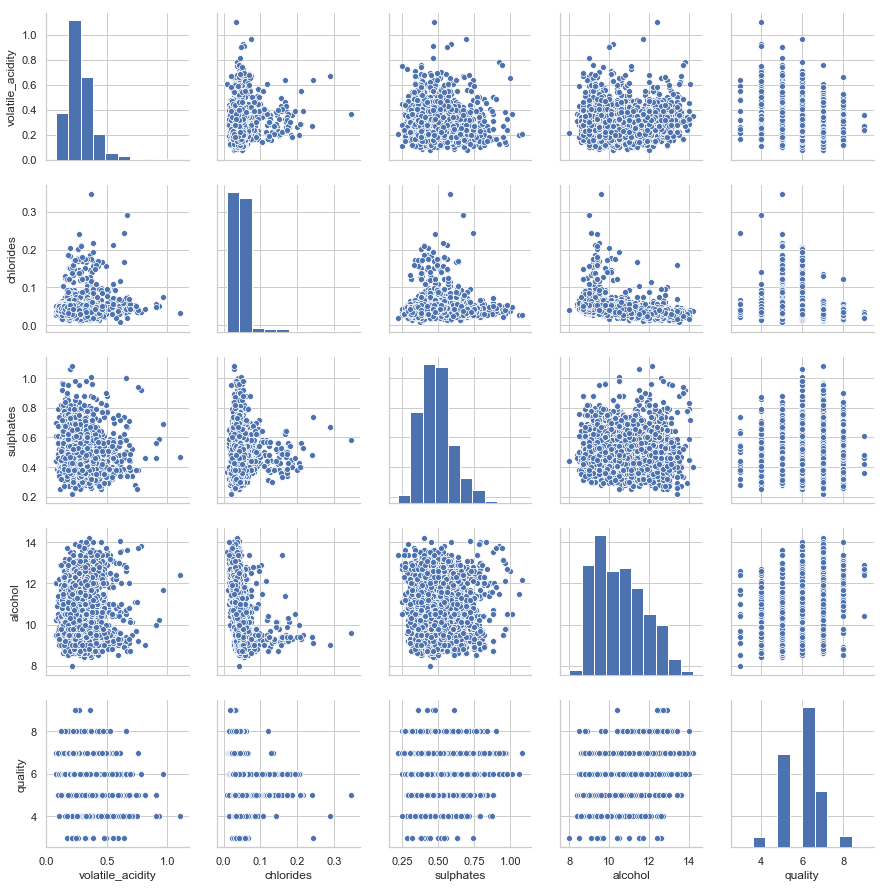

In [41]:
sns.pairplot(dataset[eda_columns], size=2.5, x_vars=eda_columns, y_vars=eda_columns)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

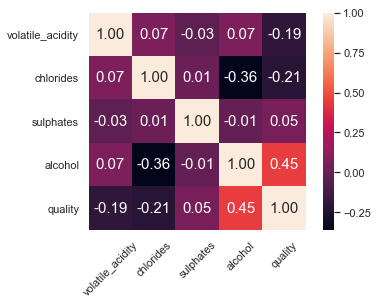

In [42]:
corr_mat = np.corrcoef(dataset[eda_columns].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,
                       fmt='.2f', annot_kws={'size': 15},
                       yticklabels=eda_columns, xticklabels=eda_columns)
plt.yticks(rotation=0)
plt.xticks(rotation=45) #대각성분이 1이라는 것은(분산이 1), 정규화가 되었다는 것

#### 상관관계 높은 것부터 조사

### 후진 제거법과 전진 선택법
최적 모델을 결정하기 위해 다양한 방법으로 변수를 추가하거나 제거한다.  

* Backward method(후진 제거법) : 전체 변수를 대상으로 미리 정의한 모든 통계 수치(유의 수준, 다중공선성 등)를 만족할 때까지 반복적으로 변수를 하나씩 제거해 나간다. 최종적으로 전반적인 통계값을 검사해 수정된 결정계수(adjusted R2)가 0.7보다 크면 좋은 모델로 받아드리고, 그렇지 않으면 기각한다.  
* 전진 선택법 : 변수 집합은 공집합에서 출발해서 전체 모델의 적합도가 좋아질 때 까지 변수를 계속 증가시켜간다. 상관관계 높은거 빠르게 뽑아서 특성을 늘려나가는 방법

__주로 후진 제거법을 사용한다.__

In [43]:
features = dataset.columns.drop('quality')
features

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [44]:
x = dataset[features]
x.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4


In [45]:
y = dataset['quality']
y.head(1)


0    6
Name: quality, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
x_train_new = sm.add_constant(x_train)
x_train_new.head(1)

,const,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2053,1.0,6.8,0.32,0.43,1.6,0.05,4.0,65.0,0.99346,3.27,0.47,10.7


> 전체 feature를 사용했을 때의 모델 (첫 번째 iteration)

(1) 각 개별 변수의 통계적 유의성(p-value)를 살펴본다.

In [50]:
x_test_new = sm.add_constant(x_test)
x_test_new.head(1)

,const,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
270,1.0,7.8,0.17,0.5,1.3,0.045,35.0,140.0,0.9904,3.16,0.4,12.0


In [52]:
lr_model = sm.OLS(y_train, x_train_new) #통계모델은 y먼저들어가고 x데이터가 나중에 들어간다, sklearn과 반대
lr_model

In [53]:
fitted_lr = lr_model.fit()

In [54]:
fitted_lr.summary() #유의성, 다중공선성 검사 durbin-watson 자기상관관계

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     105.8
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          3.02e-201
Time:                        17:47:09   Log-Likelihood:                -3080.2
No. Observations:                2742   AIC:                             6184.
Df Residuals:                    2730   BIC:                             6255.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  133.6311     22.199      6.020      0.000      90.103     177.159
fixed_acidity            0.0638      0.026      2.453      0.014       0.013       0.115
volatile_acidity        -1.8664      0.155    -12.037      0.000      -2.170      -1.562
citric_acid              0.0213      0.127      0.169      0.866      -0.227       0.270
residual_sugar           0.0823      0.009      8.894      0.000       0.064       0.100
chlorides               -0.8567      0.804     -1.066      0.286      -2.432       0.719
free_sulfur_dioxide      0.0033      0.001      3.033      0.002       0.001       0.005
total_sulfur_dioxide    -0.0001      0.000     -0.266      0.790      -0.001       0.001
density               -133.8388     22.529     -5.941      0.000    -178.015     -89.663
pH                       0.6434      0.136      4.744      0.000       0.377       0.909
sulphates                0.4929      0.133      3.703      0.000       0.232       0.754
alcohol                  0.2355      0.029      8.101      0.000       0.178       0.292
==============================================================================
Omnibus:                       64.279   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.481
Skew:                           0.100   Prob(JB):                     6.28e-30
Kurtosis:                       4.066   Cond. No.                     3.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$값 높지 않음  
p-value가 클수록 이 변수는 y값과 유의하지 않은 것, 작을수록 유의성이 큰 것  
유의하지 않은 특성을 제거한다. 

__모델 튜닝__

* AIC : 6184 (절대적인 수치는 중요하지 않다. 상대 수치가 중요하며 이전과 비교했을 때, 적을수록 좋다.)
* Adjusted R2 : 0.296 (0.7 이상이어야한다.)
* 변수 유의성에 대한 p-value : 0.05 이하이어야 한다.
* VIF를 확인한다 : 5이하(은행권처럼 보수적인 경우는 2이하를 사용)여야 한다. (유의성 낮은 변수 제거하고 확인한다.)

(2) 각 개별 변수의 VIF를 계산한다.(VIF구하는 라이브러리 없음)

In [55]:
# 1. Independent variable 1개와 나머지 independent variable를
# 구분한다. fixed_acidity를 예로 들어보자.
copied_features = features.values.tolist()[:]
var = 'fixed_acidity'
copied_features.remove(var)

In [56]:
# 2. 선형회귀모형을 생성한다. 다중공선성 확인하는 작업, 한 feature에 대한 나머지 features의 설명량을 확인
lr_model = sm.OLS(x_train[var], 
                   sm.add_constant(x_train[copied_features]))

In [57]:
# 3. 선형회귀모형을 fitting
fitted_lr_model = lr_model.fit()

In [58]:
# 4. 결정계수를 구한다.
vif = 1 / (1 - fitted_lr_model.rsquared)
print(vif)

2.444444552118102


In [64]:
def get_vif():
    for i in np.arange(0, len(features)):
        copied_features = features.values.tolist()
        var = copied_features[i]
        copied_features.remove(var)
        vif_model = sm.OLS(x_train[var],
                           sm.add_constant(x_train[copied_features]))
        fitted_lr_model = vif_model.fit()
        vif = 1 / (1 - fitted_lr_model.rsquared)
        print(var, round(vif, 4))

In [63]:
get_vif()

fixed_acidity 2.4444


{'fixed_acidity': 2.4444}

In [65]:
features = features.drop('citric_acid')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [66]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     116.5
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          2.77e-202
Time:                        17:55:11   Log-Likelihood:                -3080.2
No. Observations:                2742   AIC:                             6182.
Df Residuals:                    2731   BIC:                             6247.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  133.3886     22.148      6.023      0.000      89.960     176.817
fixed_acidity            0.0645      0.026      2.510      0.012       0.014       0.115
volatile_acidity        -1.8703      0.153    -12.203      0.000      -2.171      -1.570
residual_sugar           0.0822      0.009      8.896      0.000       0.064       0.100
chlorides               -0.8431      0.799     -1.055      0.292      -2.411       0.724
free_sulfur_dioxide      0.0033      0.001      3.043      0.002       0.001       0.005
total_sulfur_dioxide    -0.0001      0.000     -0.262      0.793      -0.001       0.001
density               -133.5916     22.478     -5.943      0.000    -177.666     -89.517
pH                       0.6415      0.135      4.747      0.000       0.377       0.906
sulphates                0.4939      0.133      3.715      0.000       0.233       0.755
alcohol                  0.2360      0.029      8.159      0.000       0.179       0.293
==============================================================================
Omnibus:                       64.204   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.260
Skew:                           0.100   Prob(JB):                     7.01e-30
Kurtosis:                       4.065   Cond. No.                     3.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__모델 비교(2)__

* AIC : 6184 → 6182
* Adjusted R2 : 0.296 → 0.296
* 변수 유의성에 대한 p-value : total_sulfur_dioxide 가 가장 높다.
* VIF를 확인한다 : density가 가장 높다.

In [67]:
features = features.drop('total_sulfur_dioxide')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [68]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     129.4
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          2.45e-203
Time:                        17:56:22   Log-Likelihood:                -3080.2
No. Observations:                2742   AIC:                             6180.
Df Residuals:                    2732   BIC:                             6240.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 134.3467     21.841      6.151      0.000      91.520     177.173
fixed_acidity           0.0646      0.026      2.514      0.012       0.014       0.115
volatile_acidity       -1.8787      0.150    -12.538      0.000      -2.173      -1.585
residual_sugar          0.0825      0.009      8.961      0.000       0.064       0.101
chlorides              -0.8462      0.799     -1.059      0.290      -2.413       0.721
free_sulfur_dioxide     0.0032      0.001      3.620      0.000       0.001       0.005
density              -134.5645     22.166     -6.071      0.000    -178.028     -91.101
pH                      0.6410      0.135      4.745      0.000       0.376       0.906
sulphates               0.4906      0.132      3.708      0.000       0.231       0.750
alcohol                 0.2360      0.029      8.163      0.000       0.179       0.293
==============================================================================
Omnibus:                       64.241   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.241
Skew:                           0.101   Prob(JB):                     7.08e-30
Kurtosis:                       4.065   Cond. No.                     9.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
get_vif()

fixed_acidity 2.3848
volatile_acidity 1.0701
residual_sugar 10.9683
chlorides 1.2208
free_sulfur_dioxide 1.1424
density 22.8755
pH 2.0478
sulphates 1.1165
alcohol 6.3191


__모델 비교(3)__

* AIC : 6182 → 6180
* Adjusted R2 : 0.296 → 0.297
* 변수 유의성에 대한 p-value : chlorides 가 가장 높다.
* VIF를 확인한다 : density가 가장 높다.
* chlorides를 먼저 삭제한다.

In [71]:
features = features.drop('chlorides')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [72]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     145.5
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          3.43e-204
Time:                        17:58:10   Log-Likelihood:                -3080.8
No. Observations:                2742   AIC:                             6180.
Df Residuals:                    2733   BIC:                             6233.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 138.0004     21.567      6.399      0.000      95.711     180.290
fixed_acidity           0.0684      0.025      2.693      0.007       0.019       0.118
volatile_acidity       -1.8934      0.149    -12.690      0.000      -2.186      -1.601
residual_sugar          0.0842      0.009      9.309      0.000       0.066       0.102
free_sulfur_dioxide     0.0031      0.001      3.572      0.000       0.001       0.005
density              -138.3946     21.869     -6.328      0.000    -181.276     -95.513
pH                      0.6634      0.133      4.971      0.000       0.402       0.925
sulphates               0.4938      0.132      3.732      0.000       0.234       0.753
alcohol                 0.2370      0.029      8.200      0.000       0.180       0.294
==============================================================================
Omnibus:                       63.818   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.766
Skew:                           0.101   Prob(JB):                     1.48e-29
Kurtosis:                       4.059   Cond. No.                     8.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
get_vif()

fixed_acidity 2.3363
volatile_acidity 1.061
residual_sugar 10.6052
free_sulfur_dioxide 1.1396
density 22.2663
pH 1.9978
sulphates 1.116
alcohol 6.3128


__모델 비교(4)__

* AIC : 6180 → 6180
* Adjusted R2 : 0.297 → 0.297
* 변수 유의성에 대한 p-value : 모두 0.05보다 낮다.
* VIF를 확인한다 : density가 가장 높다.
* density를 먼저 삭제한다.

In [75]:
features = features.drop('density')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'free_sulfur_dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [76]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     158.3
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          1.02e-196
Time:                        17:59:05   Log-Likelihood:                -3100.7
No. Observations:                2742   AIC:                             6217.
Df Residuals:                    2734   BIC:                             6265.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.5454      0.447      3.454      0.001       0.668       2.423
fixed_acidity          -0.0410      0.019     -2.186      0.029      -0.078      -0.004
volatile_acidity       -2.0404      0.148    -13.747      0.000      -2.331      -1.749
residual_sugar          0.0308      0.003      9.382      0.000       0.024       0.037
free_sulfur_dioxide     0.0035      0.001      3.943      0.000       0.002       0.005
pH                      0.1636      0.108      1.510      0.131      -0.049       0.376
sulphates               0.2630      0.128      2.053      0.040       0.012       0.514
alcohol                 0.3999      0.013     30.271      0.000       0.374       0.426
==============================================================================
Omnibus:                       62.933   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.887
Skew:                           0.080   Prob(JB):                     8.45e-30
Kurtosis:                       4.071   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
get_vif()

fixed_acidity 1.2545
volatile_acidity 1.0352
residual_sugar 1.3777
free_sulfur_dioxide 1.1353
pH 1.2979
sulphates 1.0312
alcohol 1.3007


In [78]:
features = features.drop('pH')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'free_sulfur_dioxide', 'sulphates', 'alcohol'],
      dtype='object')

In [79]:
# 모델
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# 학습
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          2.23e-197
Time:                        17:59:56   Log-Likelihood:                -3101.9
No. Observations:                2742   AIC:                             6218.
Df Residuals:                    2735   BIC:                             6259.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1370      0.216      9.888      0.000       1.713       2.561
fixed_acidity          -0.0529      0.017     -3.105      0.002      -0.086      -0.019
volatile_acidity       -2.0472      0.148    -13.796      0.000      -2.338      -1.756
residual_sugar          0.0301      0.003      9.259      0.000       0.024       0.036
free_sulfur_dioxide     0.0035      0.001      3.993      0.000       0.002       0.005
sulphates               0.2933      0.127      2.319      0.020       0.045       0.541
alcohol                 0.4001      0.013     30.277      0.000       0.374       0.426
==============================================================================
Omnibus:                       62.262   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.431
Skew:                           0.088   Prob(JB):                     4.76e-29
Kurtosis:                       4.054   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__모델 비교__

* AIC : 6217 → 6218
* Adjusted R2 : 0.287 → 0.286
* 변수 유의성에 대한 p-value : 모두 0보다 낮다.
* VIF를 확인한다 : 모두 2보다 낮다.

더 제거할까 말까는 사용자 선택

In [80]:
get_vif()

fixed_acidity 1.0338
volatile_acidity 1.0343
residual_sugar 1.3482
free_sulfur_dioxide 1.134
sulphates 1.0057
alcohol 1.3007


In [81]:
lr_test_model = sm.OLS(y_test,
                       sm.add_constant(x_test[features]))
fitted_lr_test_model = lr_test_model.fit()
fitted_lr_test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     74.69
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           5.58e-79
Time:                        18:00:07   Log-Likelihood:                -1345.9
No. Observations:                1176   AIC:                             2706.
Df Residuals:                    1169   BIC:                             2741.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6163      0.340      7.687      0.000       1.948       3.284
fixed_acidity          -0.0765      0.028     -2.743      0.006      -0.131      -0.022
volatile_acidity       -2.1259      0.216     -9.856      0.000      -2.549      -1.703
residual_sugar          0.0159      0.005      3.076      0.002       0.006       0.026
free_sulfur_dioxide     0.0031      0.001      2.084      0.037       0.000       0.006
sulphates               0.5919      0.194      3.050      0.002       0.211       0.973
alcohol                 0.3693      0.021     17.727      0.000       0.328       0.410
==============================================================================
Omnibus:                       25.579   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.130
Skew:                           0.028   Prob(JB):                     4.79e-12
Kurtosis:                       4.030   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

테스트 데이터의 adjusted R2은 0.273이다. 현재 모형은 wine quailty data를 잘 설명해주지 못하고 있다.